# Tugas Praktikum
Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/insurance.csv')

# melihat beberapa data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Variabel bebas (fitur)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Variabel target (biaya medis personal) yang ditebak
y = data['charges']


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [4]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset
print("Ukuran data latih:", X_train.shape[0])
print("Ukuran data uji:", X_test.shape[0])

Ukuran data latih: 1070
Ukuran data uji: 268


3. Lakukan feature scaling jika diperlukan.

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Misalkan 'X' adalah data fitur
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Menggunakan OneHotEncoder untuk kolom kategorikal
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ],
    remainder='passthrough'  # Menyimpan kolom yang tidak di-encode
)

# Ubah fitur jd numerik
X_encoded = column_transformer.fit_transform(X)

from sklearn.model_selection import train_test_split

# Misalkan y adalah target
y = data['charges']

# Bagi data : data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# scaling setelah diubah jd numerik
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scaling fitur dan target
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Print nilai setelah scaling
print("Contoh nilai fitur yang sudah diskalakan (X_train):")
print(X_train_scaled[:5])  

print("\nContoh nilai target yang sudah diskalakan (y_train):")
print(y_train_scaled[:5])  


Contoh nilai fitur yang sudah diskalakan (X_train):
[[ 1.0246016  -1.0246016   0.50874702 -0.50874702 -0.57663083  1.78316783
  -0.59966106 -0.5723141   0.47222651 -1.75652513  0.73433626]
 [ 1.0246016  -1.0246016   0.50874702 -0.50874702  1.73421182 -0.56079971
  -0.59966106 -0.5723141   0.54331294 -1.03308239 -0.91119211]
 [ 1.0246016  -1.0246016   0.50874702 -0.50874702 -0.57663083 -0.56079971
   1.66760869 -0.5723141   0.8987451  -0.94368672 -0.91119211]
 [ 1.0246016  -1.0246016   0.50874702 -0.50874702 -0.57663083 -0.56079971
   1.66760869 -0.5723141  -0.02537852  0.62239299  3.20262882]
 [ 1.0246016  -1.0246016   0.50874702 -0.50874702 -0.57663083  1.78316783
  -0.59966106 -0.5723141   1.04091797 -1.50489287  1.55710045]]

Contoh nilai target yang sudah diskalakan (y_train):
[[-0.3456208 ]
 [-0.40048783]
 [ 1.14633152]
 [-0.39531416]
 [-0.07247763]]


4. Buat model multiple linear regression menggunakan Scikit-Learn.

Hasil prediksi: [[ 9.08720654e+03]
 [ 6.75834157e+03]
 [ 3.65811588e+04]
 [ 9.18693124e+03]
 [ 2.66343535e+04]
 [ 1.07825264e+04]
 [-1.40260982e+02]
 [ 1.65782911e+04]
 [ 1.18549087e+03]
 [ 1.09585111e+04]
 [ 2.80961269e+04]
 [ 9.09307270e+03]
 [ 5.45018819e+03]
 [ 3.85998506e+04]
 [ 4.04066275e+04]
 [ 3.72740988e+04]
 [ 1.54285240e+04]
 [ 3.60891347e+04]
 [ 9.31598673e+03]
 [ 3.11681609e+04]
 [ 3.87219152e+03]
 [ 1.00903197e+04]
 [ 2.27659637e+03]
 [ 7.18070499e+03]
 [ 1.10523697e+04]
 [ 1.30409975e+04]
 [ 1.44664740e+04]
 [ 5.89015009e+03]
 [ 1.00844535e+04]
 [ 2.32939180e+03]
 [ 9.12826965e+03]
 [ 1.27770203e+04]
 [ 4.71105220e+03]
 [ 3.15652017e+03]
 [ 4.40014580e+03]
 [ 1.30820606e+04]
 [ 1.93635917e+03]
 [ 8.77630013e+03]
 [ 3.30061017e+04]
 [ 3.27454243e+04]
 [ 3.93085311e+03]
 [ 4.01297933e+03]
 [ 1.41145045e+04]
 [ 1.11227636e+04]
 [ 8.95815105e+03]
 [ 1.20730813e+04]
 [ 4.99849398e+03]
 [ 3.14478785e+03]
 [ 3.56902359e+04]
 [ 9.32185289e+03]
 [ 1.60210060e+04]
 [ 2.51124272e+

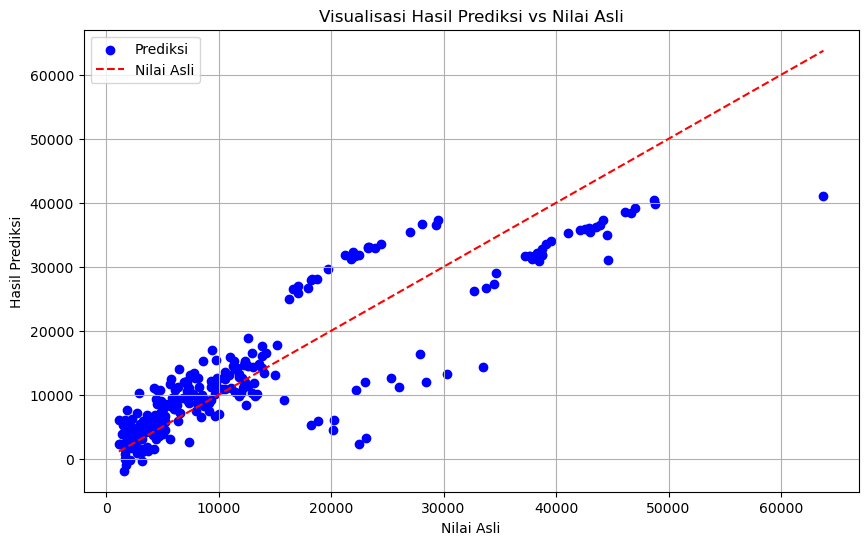

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Membuat model multiple linear regression
model = LinearRegression()

# latih model
model.fit(X_train_scaled, y_train_scaled)

# Melakukan prediksi dengan data uji
y_pred_scaled = model.predict(X_test_scaled)

# Mengembalikan hasil prediksi ke skala asli
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Menampilkan hasil prediksi
print("Hasil prediksi:", y_pred)

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Nilai Asli')
plt.title('Visualisasi Hasil Prediksi vs Nilai Asli')
plt.xlabel('Nilai Asli')
plt.ylabel('Hasil Prediksi')
plt.legend()
plt.grid()
plt.show()



- Titik biru merepresentasikan hasil prediksi model.
- Garis merah putus-putus menunjukkan di mana nilai prediksi sama dengan nilai asli. Semakin dekat titik biru ke garis ini, semakin akurat model dalam memprediksi.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [13]:
model.fit(X_train, y_train) #latih
y_pred = model.predict(X_test) #prediksi
print("Hasil Prediksi:", y_pred)

Hasil Prediksi: [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656 10864.11316424   170.28084137 16903.45028662
  1092.43093614 11218.34318352 28101.68455267  9377.73460205
  5263.0595179  38416.04221107 40255.82339284 37098.25353123
 15240.39392306 35912.88264434  9112.52398703 31461.92108909
  3847.68845883 10130.12001517  2370.54189389  7140.21550828
 11301.76782638 12961.65366224 14509.47251876  6159.8976107
  9963.85857263  2177.85718217  9115.93673493 13073.68932159
  4561.82376202  3408.20756033  4459.81359745 13032.06505076
  1979.99357292  8813.28303302 33271.29124448 32585.51583927
  3908.76090964  4326.10774721 14142.81326533 11423.45494846
  8774.13955311 12097.28051001  5281.57353499  3150.5596042
 35494.46461214  9150.1124786  15836.84575621  2343.57470069
 12364.78414194  1482.29488266 13389.06105161 12573.57395972
  4341.83680558 32165.33688042 13321.3360032  12896.82071102
 14167.99421483 10506.17623512 16360.78543548  7763.89824584
 11839.250

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

Mean Absolute Error (MAE): 4181.194473753645
Mean Squared Error (MSE): 33596915.851361476
R-squared: 0.7835929767120722


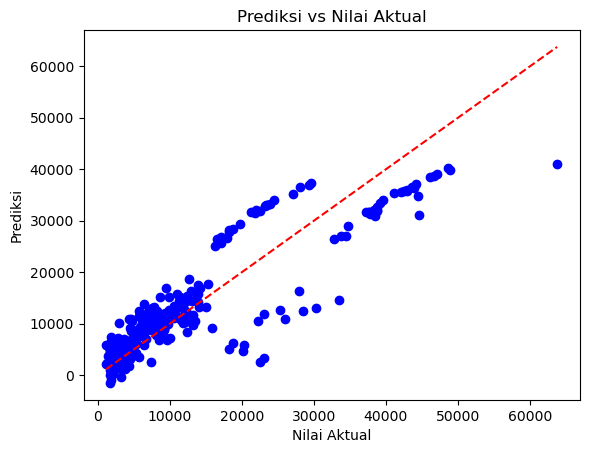

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung metrik
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

#Visualisasi
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis identitas
plt.title('Prediksi vs Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.show()


Garis merah putus-putus akan menunjukkan di mana nilai prediksi dan aktual sama. Jika titik-titik biru berada di dekat garis tersebut, maka model bekerja dengan baik.